In [1]:
# # #                                                         # # #
#                                                                 #
# This file is tagged: [WORK IN PROGESS], [PENDING DOCUMENTATION] #
#                                                                 #
# # #                                                         # # #

# Initialization

In [2]:
# Navigate to root dir to import custom module "const.py"
import sys
import os
os.chdir("../")
sys.path.append(os.getcwd())
# # #
import pandas as pd
import matplotlib.pyplot as plot
import seaborn as sns
import numpy as np
import const as const

In [3]:
df_fire_incidence_factors = pd.read_csv("./data/datasets/Oregon_Incident_Matrix.csv", sep = ',', header = 0)

# Fire Incidence Factors

In [4]:
df_fire_incidence_factors_trunc = df_fire_incidence_factors.drop(["FoundLng", "FoundLat", "OriginLng", "OriginLat"], axis = 1)

## Statistics

In [5]:
df_stats_fire_incidence_factors = df_fire_incidence_factors_trunc.describe(percentiles = [0.01, 0.05, 0.25, 0.5, 0.75, 0.95, 0.99])
df_stats_fire_incidence_factors.T.style.format(precision = 3)

,count,mean,std,min,1%,5%,25%,50%,75%,95%,99%,max
Year,15834.000,2017.921,2.630,2011.000,2014.000,2014.000,2015.000,2018.000,2020.000,2022.000,2022.000,2022.000
Month,15834.000,7.408,1.715,1.000,2.000,4.000,7.000,8.000,8.000,10.000,12.000,12.000
Precipitation,15834.000,1.040,2.118,0.000,0.010,0.040,0.200,0.480,1.030,3.480,10.030,26.010
Temperature_Mean,15834.000,61.474,9.340,22.700,33.400,40.200,57.200,64.500,67.800,71.700,73.000,77.700
Temperature_Max,15834.000,76.135,11.284,30.900,42.400,50.200,71.300,80.000,84.200,87.900,89.700,94.300
Temperature_Min,15834.000,46.807,7.821,13.600,23.600,30.100,42.900,48.800,52.600,55.900,57.200,61.200


## Histograms

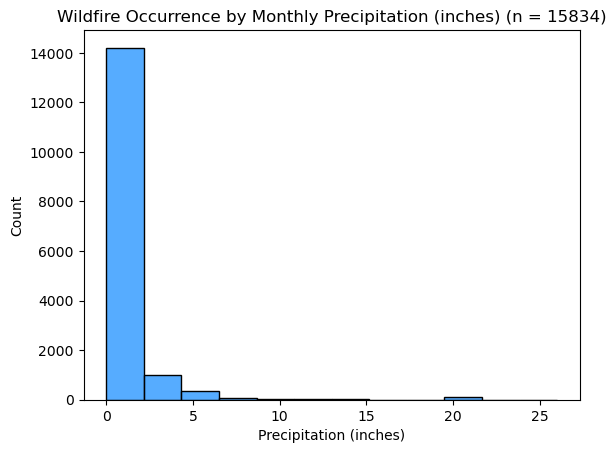

In [6]:
df_incidence_factors_precipitation = df_fire_incidence_factors_trunc.xs("Precipitation", axis = 1)

plot_precipitation_hist = sns.histplot(x = df_incidence_factors_precipitation, bins = 12, color = "dodgerblue")
plot_precipitation_hist.set_title("Wildfire Occurrence by Monthly Precipitation (inches) (n = {})".format(df_incidence_factors_precipitation.count()))
plot_precipitation_hist.set_xlabel("Precipitation (inches)");

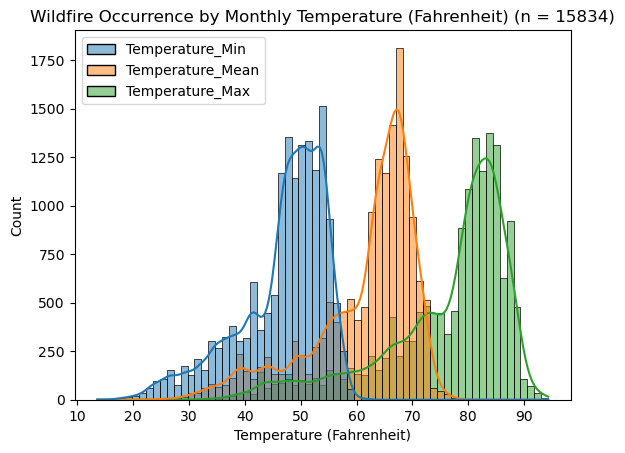

In [7]:
df_incidence_factors_temp = [df_fire_incidence_factors_trunc.xs("Temperature_Min", axis = 1),
                             df_fire_incidence_factors_trunc.xs("Temperature_Mean", axis = 1),
                             df_fire_incidence_factors_trunc.xs("Temperature_Max", axis = 1)]

plot_temp_hist = sns.histplot(data = df_incidence_factors_temp, kde = True)
plot_temp_hist.set_title("Wildfire Occurrence by Monthly Temperature (Fahrenheit) (n = {})".format(len(df_incidence_factors_temp[0])))
plot_temp_hist.set_xlabel("Temperature (Fahrenheit)");

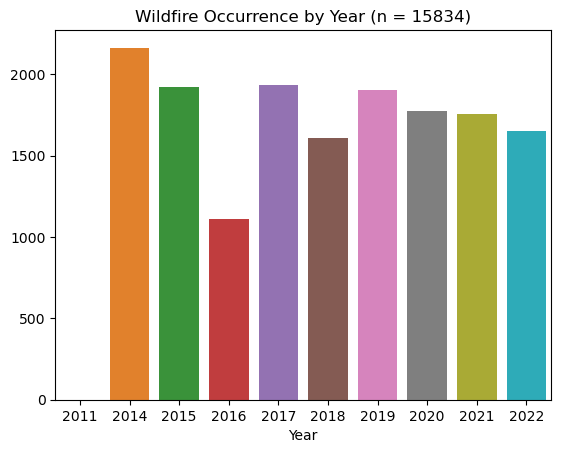

In [8]:
df_incidence_factors_year = df_fire_incidence_factors_trunc.xs("Year", axis = 1).value_counts().sort_index().to_frame()

plot_year_hist = sns.barplot(data = df_incidence_factors_year.T)
plot_year_hist.set_title("Wildfire Occurrence by Year (n = {})".format(df_fire_incidence_factors_trunc.xs("Year", axis = 1).count()))
plot_year_hist.set_xlabel("Year");

# df_incidence_factors_year